# Task 1

For task 1, it is required to find the best path given a grid with random time weights between 0 and 9. To solve the task, three different algorithms are impemented:
- **random search**: algorithm to obtain the solution with random steps on the grid
- **simple search**: basic algorithm for finding a faster path by evaluating the best movement based on adjacent cells
- **Dijsktra search**: algorithm based on Dijkstra's famous algorithm for finding the shortest distance between two nodes in a graph


In [1]:
import sys
sys.path.insert(0, '/Users/laerte/MSc_AI/Projects/pam_ai/src')
import matplotlib.pyplot as plt
import numpy as np

from Task_1.agent import GameAgent
from Task_1.grid import GameGrid
from Task_1.simple_search import SimpleSearch
from Task_1.Dijkstra_search import DijkstraSearch
from Task_1.random_search import RandomSearch

### Initialise the grid

The grid is generated parametrically via the GameGrid class. This class, taking the vertical and horizontal dimensions as input, generates a grid filled with random numbers between 0 and 9.

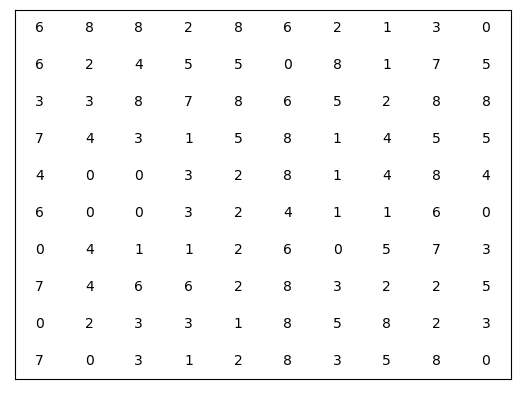

In [2]:
# The grid is initiated and printed using the GameGrid class. 
# It requires as argumentes the vertical and horizontal dimensions of the grid
grid = GameGrid(10,10) 
grid.generate_grid()
save_path = "" # "/Users/laerte/MSc_AI/Projects/pam_ai/results/Task1/grid.png" # to save the grid as png file
grid.print_grid(save_path= save_path);

### Random Search

Random Search score: 911


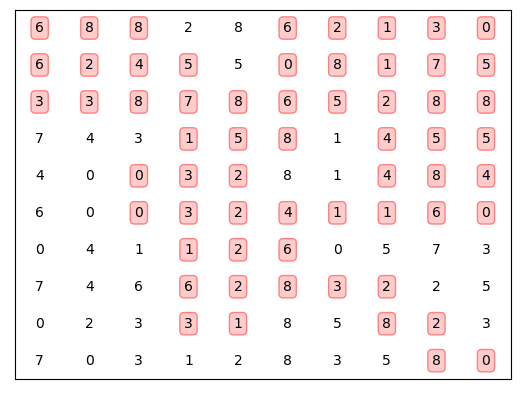

In [3]:
# The object GameAgent is employed to store agent position and the overall time of game movements (i.e., timer)
# It is initated given the initial position of the agent, i.e., (0,0) to make it start at left-upper corner
ag_random = GameAgent(0,0)

# Initialise the RandomSearch class, given the agent, the grid and the maximum number of steps
randSearch = RandomSearch(ag_random, grid, 1000)
randSearch.compute_path()

save_path = "" # "/Users/laerte/MSc_AI/Projects/pam_ai/results/Task1/random.png"
grid.print_path(randSearch.visited_set,save_path=save_path) # print the grid and the path followed
print("Random Search score: {}".format(ag_random.timer))

### Simple Search

Simple Search score: 57


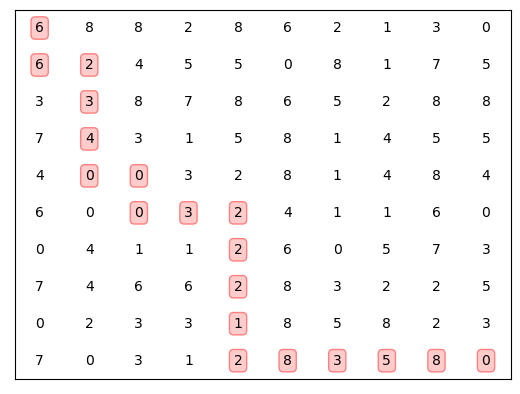

In [4]:
# Initialise the agent for Simple Search
ag_simple = GameAgent(0,0)

# Initialise the SimpleSearch class, given the agent and the grid 
simpSearch = SimpleSearch(ag_simple,grid)
simpSearch.compute_path()

save_path = "" # "/Users/laerte/MSc_AI/Projects/pam_ai/results/Task1/simple.png"
grid.print_path(simpSearch.visited_set, save_path=save_path) # print the grid and the path followed
print("Simple Search score: {}".format(ag_simple.timer))

### Dijkstra Search


Dijkstra Search score: 43


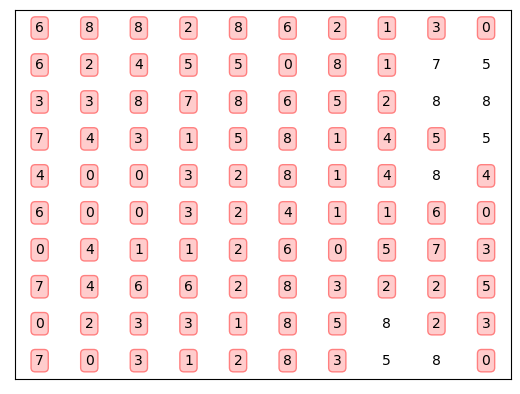

In [5]:
# Initialise the agent for Dijkstra Search
ag_dijkstra = GameAgent(0,0)

# Initialise the DijkstraSearch class, given the agent and the grid 
dijSearch = DijkstraSearch(ag_dijkstra, grid)
dijSearch.compute_path()

save_path = "" # "/Users/laerte/MSc_AI/Projects/pam_ai/results/Task1/dijkstra.png"
grid.print_path(dijSearch.visited_set, save_path= save_path) # print the grid and the path followed
print("Dijkstra Search score: {}".format(ag_dijkstra.timer))

### First results

An initial comparison of the algorithms can be made by evaluating:
- the algorithm score
- the time required to obtain a solution

#### Score

In [6]:
print("Random Search score: {}".format(ag_random.timer))
print("Simple Search score: {}".format(ag_simple.timer))
print("Dijkstra Search score: {}".format(ag_dijkstra.timer))

Random Search score: 911
Simple Search score: 57
Dijkstra Search score: 43


#### Execution Time

In order to allow an objective measurement of the efficiency of the algorithm used, the execution time was calculated during the execution of the compute_path method. This time, saved as execution_time for each algorithm class, is used for a comparison of the speed difference in the search for the solution. 

In [7]:
print("Random Search execution time: {time:.3f} ms".format(time = ag_random.execution_time))
print("Simple Search: {time:.3f} ms".format(time = ag_simple.execution_time))
print("Dij Search: {time:.3f} ms".format(time = ag_dijkstra.execution_time))

Random Search execution time: 0.379 ms
Simple Search: 0.055 ms
Dij Search: 3.389 ms


As a first conclusion, it can be observed that the worst score is obtained with the random search. The comparison with the simple search and the Dijkstra search, on the other hand, presents more variable results. In some situations, the score is very similar, in others, the Dijkstra search score is much better than the simple search. A more accurate analysis on the sensitivity of these values is postponed to a later section of the notebook.

As far as calculation times are concerned, the fastest algorithm turns out to be the simple search. The Dijkstra search has a longer execution time, but its score tends to be better. With regard to the execution time of the random search, a great dependence on the size of the grid is expected. For a small grid, the results are comparable to the Dijkstra search time, but for larger grids, an extremely longer execution time is expected.

### Performance analysis

The performance of the algorithms is evaluated in terms of execution time and score (i.e., time steps) required to get to the solutions. 
A first evaluation is proposed plotting the comparing varaibles for the three algorithms, increasing the dimension of the grid.
Whenever necessary, deeper insights will be evaluated.

In [21]:
# Initialise parameters
square_dimesions = np.array([(10,10),(20,20),(30,30),(50,50),(75,75),(100,100)])#(150,150),(200,200),(300,300),(400,400),(500,500),(1000,1000)])
n_executions = 50

# Initialise output variables
random_execution_time = np.zeros(square_dimesions.shape[0])
simple_execution_time = np.zeros(square_dimesions.shape[0])
dijkstra_execution_time = np.zeros(square_dimesions.shape[0])

random_score   = np.zeros(square_dimesions.shape[0])
simple_score   = np.zeros(square_dimesions.shape[0])
dijkstra_score = np.zeros(square_dimesions.shape[0])

For each input dimension, a grid is generated and solved with the three defined algorithms. To aid stabilisation of solutions, each grid dimension is evaluated a number of times equal to n_executions. To evaluate the execution times of the algorithms, the absolute value averaged over all n_executions for each grid dimension is taken. Score comparisons, on the other hand, are made relative to the Dijkstra algorithm score. This is because, following several executions, it was found to be the algorithm that tends to produce the best (i.e. lowest) score.

In [22]:
# Initialise agents for the three algorithms
ag_random = GameAgent(0,0)
ag_simple = GameAgent(0,0)
ag_dijsktra = GameAgent(0,0)

for index in range(square_dimesions.shape[0]): # loop on every dimension of the grid

    # Initialise variables for comparison
    temp_time_random = np.zeros(n_executions)
    temp_time_simple = np.zeros(n_executions)
    temp_time_dijkstra = np.zeros(n_executions)

    temp_score_random = np.zeros(n_executions)
    temp_score_simple = np.zeros(n_executions)
    temp_score_dijkstra = np.zeros(n_executions)

    for i in range(n_executions): # repeat computations for n_executions times

        # Generate the grid with given dimensions
        grid = GameGrid(square_dimesions[index][0],square_dimesions[index][1])   # type: ignore
        grid.generate_grid()

        # Reset the agent
        ag_random.reset()
        ag_simple.reset()
        ag_dijkstra.reset()

        # Compute path employing the algorithms
        RandomSearch(ag_random,grid,100000).compute_path()
        SimpleSearch(ag_simple,grid).compute_path()
        DijkstraSearch(ag_dijkstra, grid).compute_path()

        # Store the execution time for each execution
        temp_time_random[i]   = ag_random.execution_time
        temp_time_simple[i]   = ag_simple.execution_time
        temp_time_dijkstra[i] = ag_dijkstra.execution_time

        # Store the score for each execution
        temp_score_random[i]   = ag_random.timer
        temp_score_simple[i]   = ag_simple.timer
        temp_score_dijkstra[i] = ag_dijkstra.timer

    # OUTPUT    
    # Store the avaraged execution time
    random_execution_time[index]   = temp_time_random.mean()
    simple_execution_time[index]   = temp_time_simple.mean()
    dijkstra_execution_time[index] = temp_time_dijkstra.mean()

    # Store the avaraged score
    random_score[index]   = temp_score_random.mean()
    simple_score[index]   = temp_score_simple.mean()
    dijkstra_score[index] = temp_score_dijkstra.mean()
    

#### Execution Time

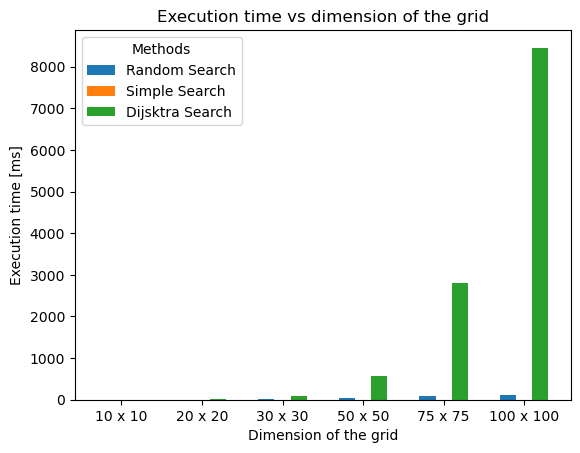

In [43]:
width = 0.2
x_pos = np.arange(len(random_execution_time))
x_labels = ["{} x {}".format(square_dimesions[x][0],square_dimesions[x][1]) for x in range(square_dimesions.shape[0])]

fig, ax = plt.subplots()
plt.bar(x_pos - width, random_execution_time, width, label = "Random Search")
plt.bar(x_pos, simple_execution_time,width, label = "Simple Search")
plt.bar(x_pos + width, dijkstra_execution_time, width, label = "Dijsktra Search")

plt.xticks(x_pos , x_labels)
plt.legend(title="Methods")
plt.title("Execution time vs dimension of the grid")
ax.set_xlabel("Dimension of the grid")
ax.set_ylabel("Execution time [ms]");

#### Execution Time (excluding Dijkstra search)

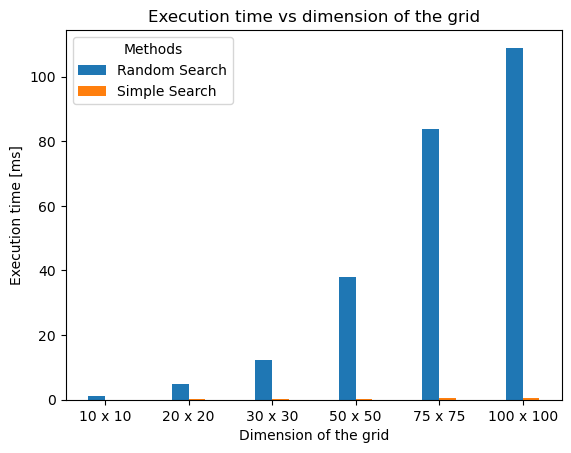

In [44]:
fig, ax = plt.subplots()
plt.bar(x_pos, random_execution_time, width, label = "Random Search")
plt.bar(x_pos +  width, simple_execution_time,width, label = "Simple Search")

plt.xticks(x_pos + width / 2 , x_labels)
plt.legend(title="Methods")
plt.title("Execution time vs dimension of the grid")
ax.set_xlabel("Dimension of the grid")
ax.set_ylabel("Execution time [ms]");

#### Score

A first analysis consists in plotting the score obtained in average for the three methods

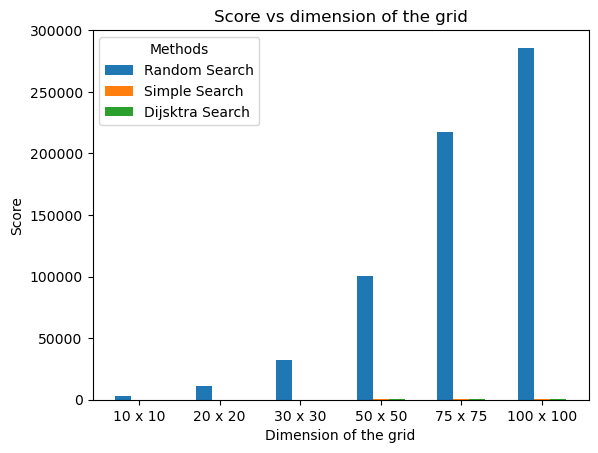

In [45]:
fig, ax = plt.subplots()
plt.bar(x_pos - width, random_score, width, label = "Random Search")
plt.bar(x_pos, simple_score,width, label = "Simple Search")
plt.bar(x_pos + width, dijkstra_score, width, label = "Dijsktra Search")

plt.xticks(x_pos , x_labels)
plt.legend(title="Methods")
plt.title("Score vs dimension of the grid")
ax.set_xlabel("Dimension of the grid")
ax.set_ylabel("Score");

The Random Search, as expected, produces an extreamely high score. In this case, it is better to focus only on Simple and Dijkstra Search.

#### Score (excluding Random Search)

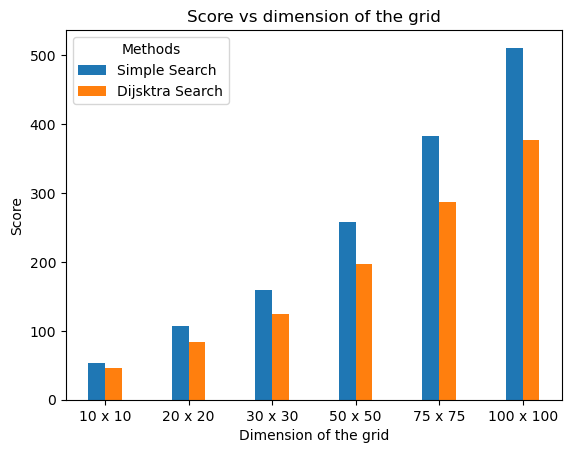

In [46]:
fig, ax = plt.subplots()
plt.bar(x_pos, simple_score,width, label = "Simple Search")
plt.bar(x_pos + width, dijkstra_score, width, label = "Dijsktra Search")

plt.xticks(x_pos + width / 2, x_labels)
plt.legend(title="Methods")
plt.title("Score vs dimension of the grid")
ax.set_xlabel("Dimension of the grid")
ax.set_ylabel("Score");

Evaluating the scores for the Dijkstra and the Simple Search, it is clear that the latter one always find a worst (i.e., higher) score compared to the former. In particular, it is observed a tedency to have bigger difference between the two methods the bigger the grid (see next for more details)

#### Combined results

In order to evaluate the perferomance of the Simple Search (algorithm with the best times) and the Dijkstra Search (algorithm with the best score) in more detail, the ratios of the comparison variables should be evaluated

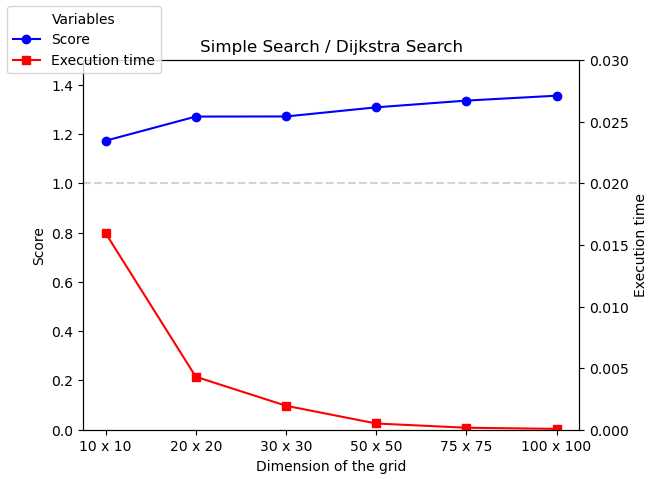

In [47]:
score_simple_dijkstra = simple_score / dijkstra_score
time_simple_dijkstra = simple_execution_time / dijkstra_execution_time

fig, ax = plt.subplots()

plt.plot(x_labels,score_simple_dijkstra,"o-",c = "b",label="Score")
ax2 = ax.twinx()
ax2.plot(x_labels,time_simple_dijkstra,"s-",c = "r",label="Execution time")
fig.legend(title="Variables",loc="upper left")
ax2.set_ylim(0,0.03)
ax.set_ylim(0,1.5)
ax.axhline(1, c = "lightgrey", linestyle="--")
plt.title("Simple Search / Dijkstra Search")
ax.set_xlabel("Dimension of the grid")
ax.set_ylabel("Score")
ax2.set_ylabel("Execution time");


The comparison between the two methods highlights the following aspects:
- in terms of cost, Dijkstra's method is always better than simple search. Furthermore, as the complexity of the grid increases, there is also a tendency to have a Dijkstra score that is always better than the Simple
- in terms of execution time, Simple Search has a much better performance with a strong tendency to improve with increasing complexity (i.e., Dijkstra always performs worse for larger and larger grids) 